# Metadata

Analyze the angle metadata for Binaural-MUSDB.

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Parameters

In [2]:
PLOT_DIR = '../data/plots'

In [3]:
plt.style.use('petroff10') # 'tableau-colorblind10'

In [4]:
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
STEMS = ['bass', 'drums', 'other', 'vocals']
DATASETS = ['_', 'binaural', 'stereo']
MODELS = ['htdemucs', 'spleeter', 'umxhq']

In [6]:
DATASET_PALETTE = dict(zip(DATASETS, COLORS[:3]))
STEM_PALETTE = dict(zip(STEMS, COLORS[3:7]))
MODEL_PALETTE = dict(zip(MODELS, COLORS[7:]))

### Test Dataset

In [7]:
DATA_DIR = '../data/binaural_musdb18/test/'

In [8]:
file_list = [f for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]

In [9]:
song = []
source = []
angle = []

for file in file_list:
    with open(os.path.join(DATA_DIR, file, 'metadata.json'), 'rb') as f:
        data = json.load(f)
        for k, v in data.items():
            if v > 90:
                v = v - 360
            song.append(file)
            source.append(k)
            angle.append(v)

In [10]:
angles_test = pd.DataFrame({'title': song, 'source': source, 'random_angle': angle})

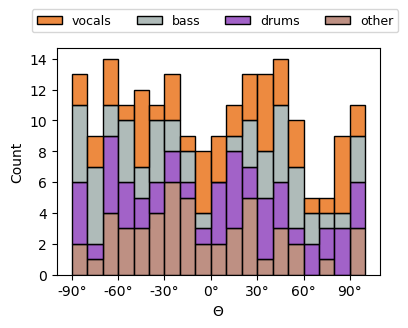

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True, sharex=True, sharey=True)

sns.histplot(x='random_angle', hue='source', multiple='stack',
             data=angles_test, palette=STEM_PALETTE, binwidth=10, binrange=[-90, 100], ax=ax)

_legend = ax.legend_
h = _legend.legend_handles
l = [t.get_text() for t in _legend.get_texts()]

ax.set_xticks([-90, -60, -30, 0, 30, 60, 90],
               ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°'])
ax.get_legend().remove()
ax.set(ylabel='Count', xlabel='$\Theta$')

fig.legend(h, l, loc='upper center', fontsize=9, ncols=4, bbox_to_anchor=(0.55, 1.1))

# plt.savefig('../data/plots/binaural_musdb_test_angles.pdf', bbox_inches='tight')
plt.show()

**Export Metadata for Test Set**

In [12]:
angles_test.to_csv('../data/binaural_musdb18/metadata.csv')

### Training Dataset

In [13]:
DATA_DIR = '../data/binaural_musdb18/train/'

In [14]:
file_list = [f for f in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, f))]

In [15]:
song = []
source = []
angle = []

for file in file_list:
    with open(os.path.join(DATA_DIR, file, 'metadata.json'), 'rb') as f:
        data = json.load(f)
        for k, v in data.items():
            if v > 90:
                v = v - 360
            song.append(file)
            source.append(k)
            angle.append(v)

In [16]:
angles_train = pd.DataFrame({'title': song, 'source': source, 'random_angle': angle})

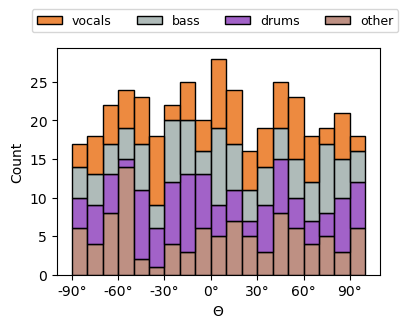

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True, sharex=True, sharey=True)

sns.histplot(x='random_angle', hue='source', multiple='stack',
             data=angles_train, palette=STEM_PALETTE, binwidth=10, binrange=[-90, 100], ax=ax)

_legend = ax.legend_
h = _legend.legend_handles
l = [t.get_text() for t in _legend.get_texts()]

ax.set_xticks([-90, -60, -30, 0, 30, 60, 90],
               ['-90°', '-60°', '-30°', '0°', '30°', '60°', '90°'])
ax.get_legend().remove()
ax.set(ylabel='Count', xlabel='$\Theta$')

fig.legend(h, l, loc='upper center', fontsize=9, ncols=4, bbox_to_anchor=(0.55, 1.1))

plt.show()

### All Metadata

In [18]:
angles_train['data_split'] = 'train'
angles_test['data_split'] = 'test'

In [19]:
# combine dfs
all_angles = pd.concat([angles_test, angles_train], ignore_index=True)
# convert the angle to be in the positive theta direction
all_angles['random_angle'] = all_angles['random_angle'].apply(lambda x: x + 360 if x < 0 else x)

In [20]:
# convert df to dict
nested_dict = {}

for _, row in all_angles.iterrows():
    split = row['data_split']
    title = row['title']
    source = row['source']
    angle = row['random_angle']

    nested_dict.setdefault(split, {}).setdefault(title, {})[source] = angle

In [21]:
# convert to json
json_str = json.dumps(nested_dict, indent=2)

In [22]:
# Save to file
with open("../data/binaural_musdb_metadata.json", "w") as f:
    f.write(json_str)